# Execute the module

In [102]:
import os
%run ../pdipy/core.py

pdi = PDIBacterialPkg(verbose = True)

pdi.define_bacterium(bacterial_specie)
pdi.define_photosensitizer(photosensitizer_molar, photosensitizer = 'A3B_4Zn')
pdi.define_light(light_source = 'LED', irradiance = 37.92,)
pdi.define_photosensitizer_volume()
pdi.singlet_oxygen_calculations(timestep = .010, total_time = 2)
pdi.geometric_oxidation()
pdi.kinetic_calculation()
pdi.export()


# pdi.define('Saureus', 'A3B_4Zn', photosensitizer_conc = 1, light_source = 'LED', irradiance = 37.92)
# raw_data = pdi.time_to_threshold(timestep = .010, total_time = 2)

%matplotlib inline

NameError: name 'bacterial_specie' is not defined

In [37]:
import pdipy

pdi = pdipy.PDIBacterialPkg()
print(pdi.results)

{}


# brainstorming

// Created by libAntimony v2.12.0.3
model *pdi_oxidation()

  // Compartments and Species:
  species o, so, bcfa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + bcfa);

  // Reactions:
  _J0: o -> so; 1e-9*o;
  _J1: so + bcfa -> ofa; 12*so*bcfa;

  // Species initializations:
  o = 130000000000;
  so = 0;
  bcfa = 1000;
  ofa = 0;

  // Variable initializations:
  biofilm = 0.05;
  vitality = 0.1;

  // Other declarations:
  var oxidation;
  const biofilm, vitality;
end


Current integrator: 
 < roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false
         max_output_rows: 100000



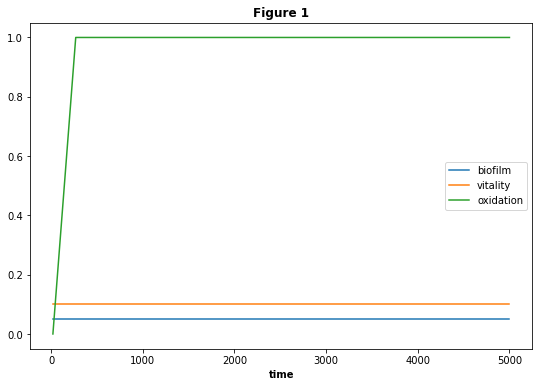

In [57]:
import tellurium

# define the first equation
k_so = 1e-9
mo = 1.3e11

# define the second equation
k = 12
bcfa = 1e3

# define constants
healing_kinetics = 3
biofilm_threshold = .05
death_threshold = 0.1

# define the SBML model
model = (f'''
  model pdi_oxidation
    # expressions
    o -> so;  {k_so}*o
    so + bcfa -> ofa; {k}*so*bcfa #- {healing_kinetics}*ofa    # the aggregated photons / second must be programmatically inserted into the rate expression         

    # define the first expression 
    o = {mo}

    # define the second expression
    so = 0
    ofa = 0
    bcfa = {bcfa}

    # define constants
    biofilm = {biofilm_threshold};
    vitality = {death_threshold};
    oxidation := ofa / (ofa + bcfa);

  end
''')
tellurium_model = tellurium.loada(model)
print(tellurium_model.getCurrentAntimony())
print('\nCurrent integrator:', '\n', tellurium_model.integrator)


# define the SEDML plot
initial_time = 20
final_time = 5000
total_points = 20
phrasedml_str = '''
  model1 = model "pdi_oxidation"
  sim1 = simulate uniform({}, {}, {})
  task1 = run sim1 on model1
  plot "Figure 1" time vs biofilm, vitality, oxidation
'''.format(initial_time, final_time, total_points)

# create, execute, and export an OMEX file
inline_omex = '\n'.join([model, phrasedml_str])               
tellurium.executeInlineOmex(inline_omex)